In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [3]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns

In [7]:
df.duplicated().sum()

5268

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop(columns=['InvoiceNo','Description'],axis=1,inplace=True)

In [12]:
df.columns

Index(['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')

### Explore the basic statistics of the dataset, including measures of central tendency and dispersion

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df['Quantity'].mean()

12.183272576966365

In [15]:
df['UnitPrice'].median()

1.95

In [16]:
df['Country'].mode()[0]

'United Kingdom'

In [17]:
df['Quantity'].std()

250.28303714444849

In [18]:
df['Quantity'].var()

62641.59868224938

### Perform data visualization to gain insights into the dataset

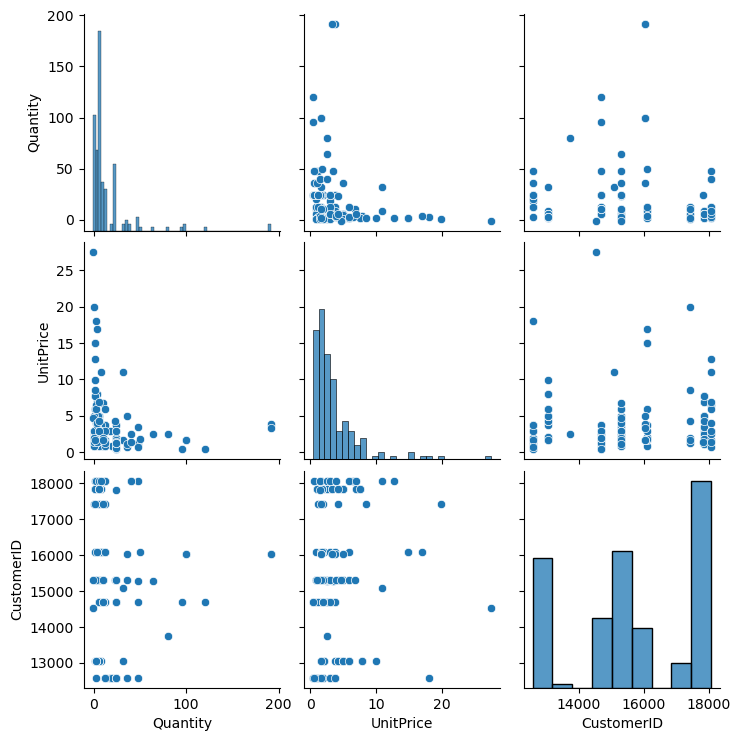

In [19]:
sns.pairplot(df.head(180))

C:\Users\gupte\AppData\Local\Temp\ipykernel_17364\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

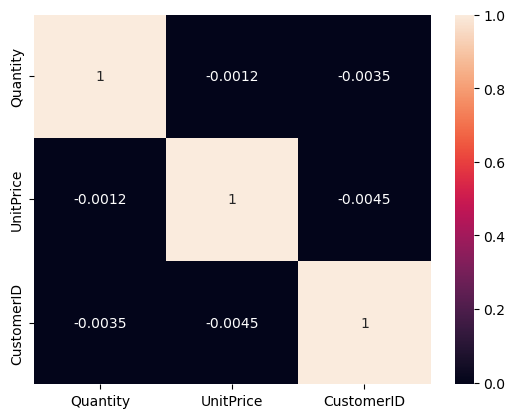

In [20]:
sns.heatmap(df.corr(),annot=True)

### Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [22]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['day']=pd.to_datetime(df.InvoiceDate).dt.day_name()
df['month']=pd.to_datetime(df.InvoiceDate).dt.month
df['year']=pd.to_datetime(df.InvoiceDate).dt.year

In [23]:
df.drop(['InvoiceDate'],axis=1,inplace=True)

In [24]:
df.head()

,StockCode,Quantity,UnitPrice,CustomerID,Country,day,month,year
0,85123A,6,2.55,17850.0,United Kingdom,Wednesday,12,2010
1,71053,6,3.39,17850.0,United Kingdom,Wednesday,12,2010
2,84406B,8,2.75,17850.0,United Kingdom,Wednesday,12,2010
3,84029G,6,3.39,17850.0,United Kingdom,Wednesday,12,2010
4,84029E,6,3.39,17850.0,United Kingdom,Wednesday,12,2010


<Axes: xlabel='month', ylabel='Quantity'>

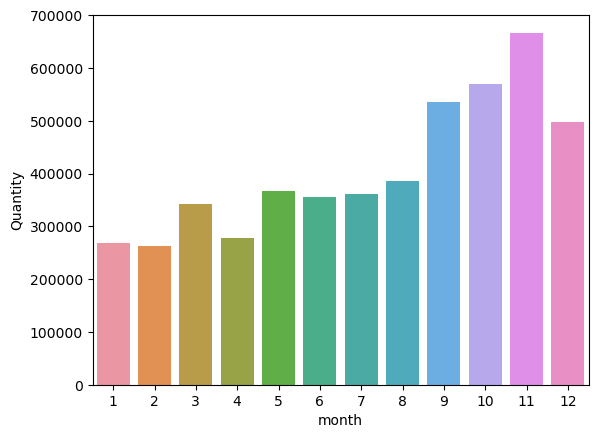

In [27]:
x=df.groupby('month').Quantity.sum().reset_index().iloc[:,0]
y=df.groupby('month').Quantity.sum().reset_index().iloc[:,1]
sns.barplot(x=x,y=y)

<Axes: xlabel='day', ylabel='Quantity'>

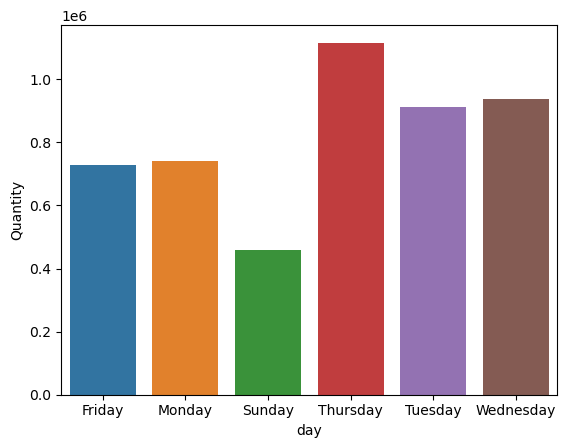

In [28]:
x=df.groupby('day').Quantity.sum().reset_index().iloc[:,0]
y=df.groupby('day').Quantity.sum().reset_index().iloc[:,1]
sns.barplot(x=x,y=y)

<Axes: xlabel='month', ylabel='Quantity'>

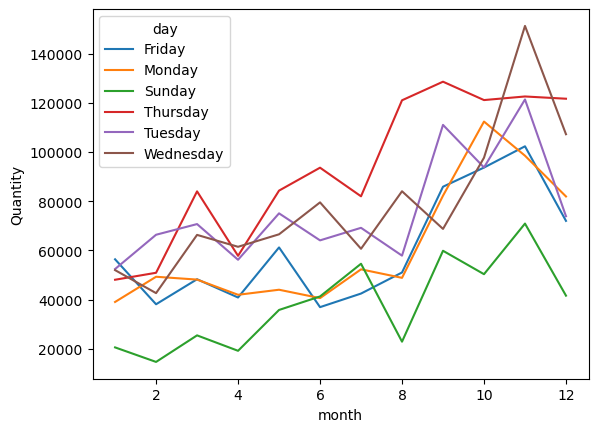

In [29]:
x=df.groupby(['month','day']).Quantity.sum().reset_index()
sns.lineplot(x='month',y='Quantity',hue='day',data=x)

### Explore the top-selling products and countries based on the quantity sold.

<Axes: xlabel='Country', ylabel='Quantity'>

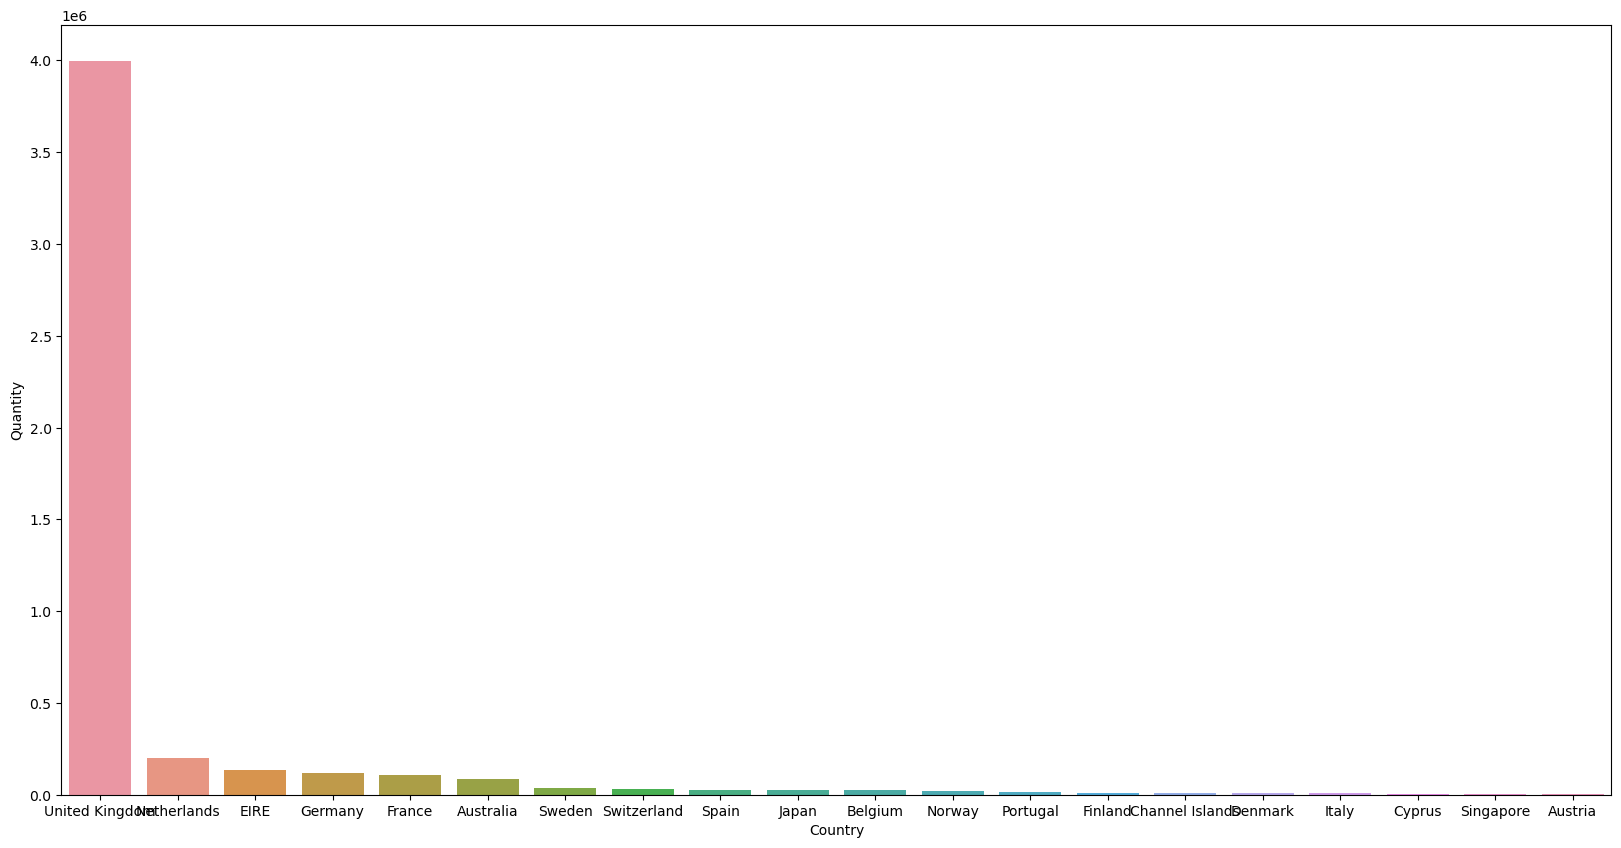

In [33]:
plt.figure(figsize=(20,10))
df1=df.groupby('Country').Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.Country
y=df1.iloc[:,1]
sns.barplot(x=x[:20],y=y[:20],data=df1)

<Axes: xlabel='StockCode', ylabel='Quantity'>

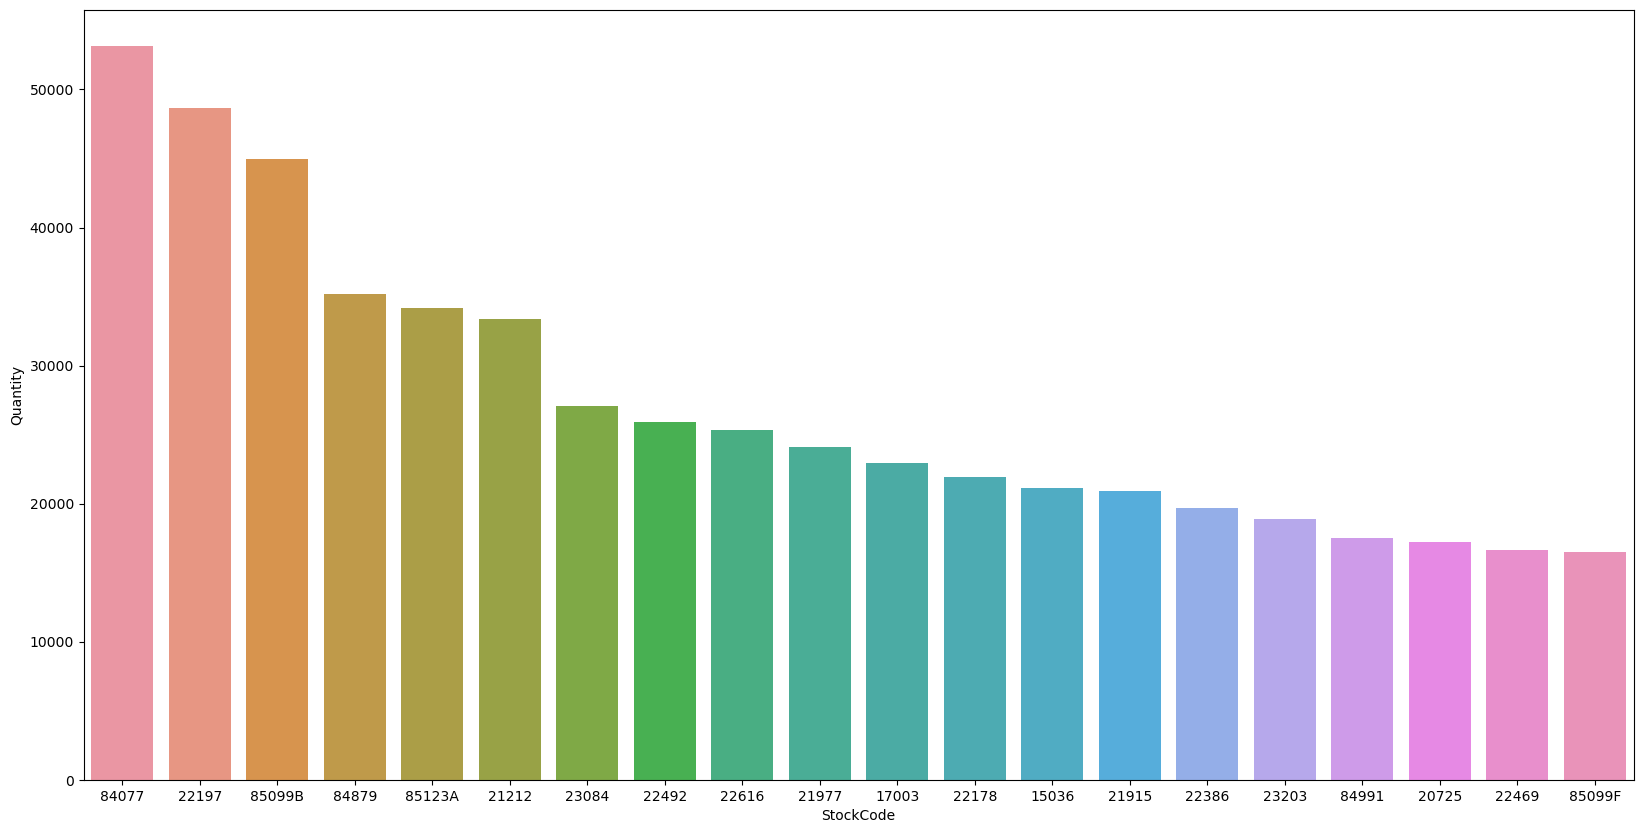

In [34]:
plt.figure(figsize=(20,10))
df1=df.groupby('StockCode').Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.StockCode
y=df1.iloc[:,1]
sns.barplot(x=x[:20],y=y[:20],data=df1)

<Axes: xlabel='StockCode', ylabel='Quantity'>

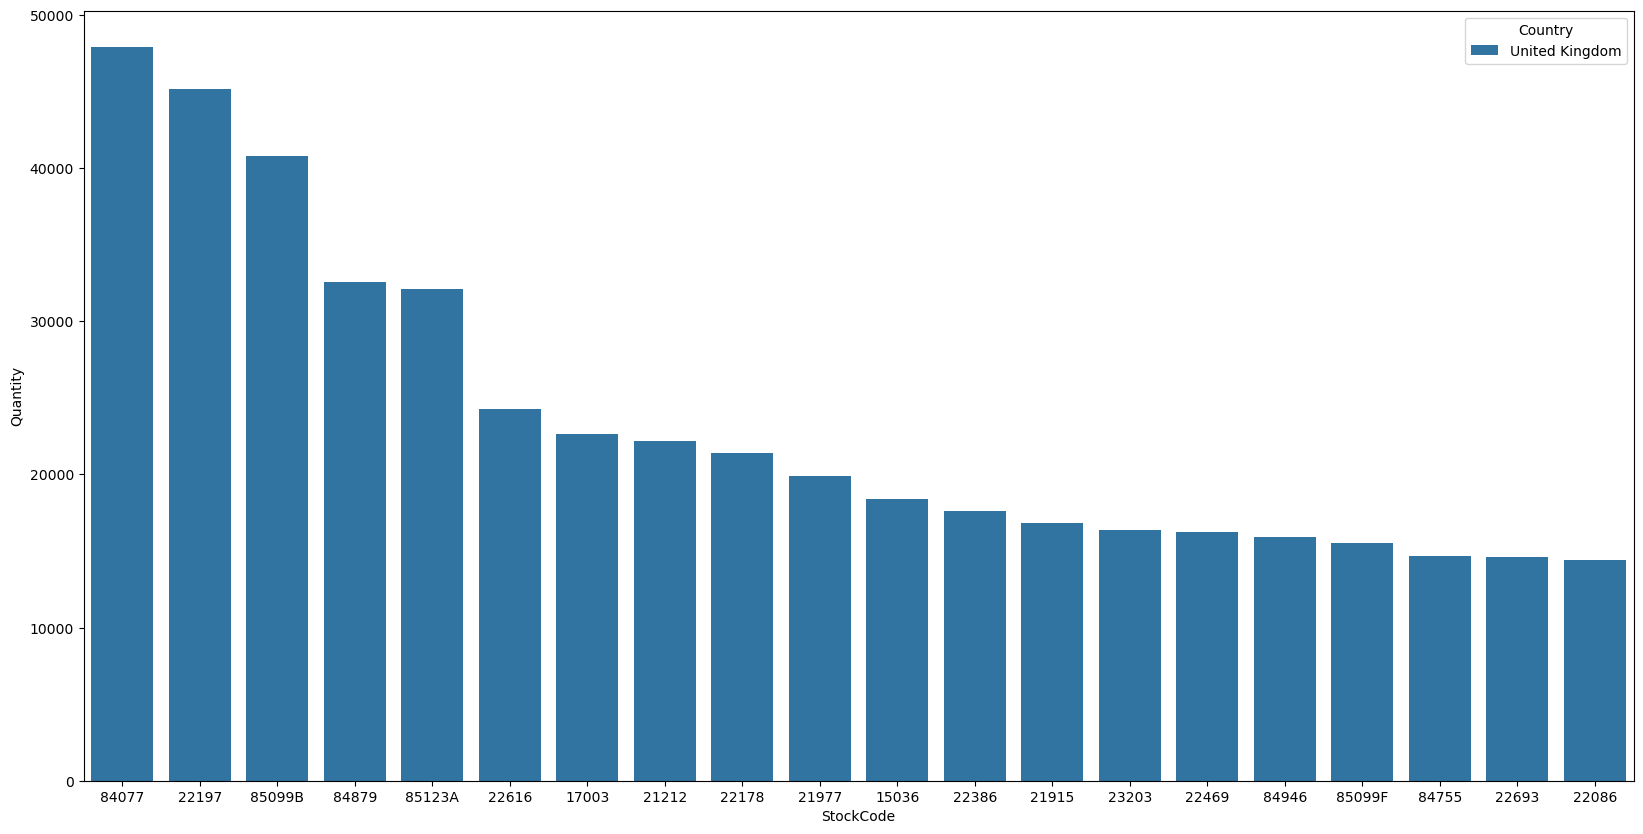

In [35]:
plt.figure(figsize=(20,10))
df1=df.groupby(['StockCode','Country']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.StockCode
y=df1.iloc[:,2]
sns.barplot(x=x[:20],y=y[:20],data=df1,hue=df1.Country[:20])

<Axes: xlabel='CustomerID', ylabel='Quantity'>

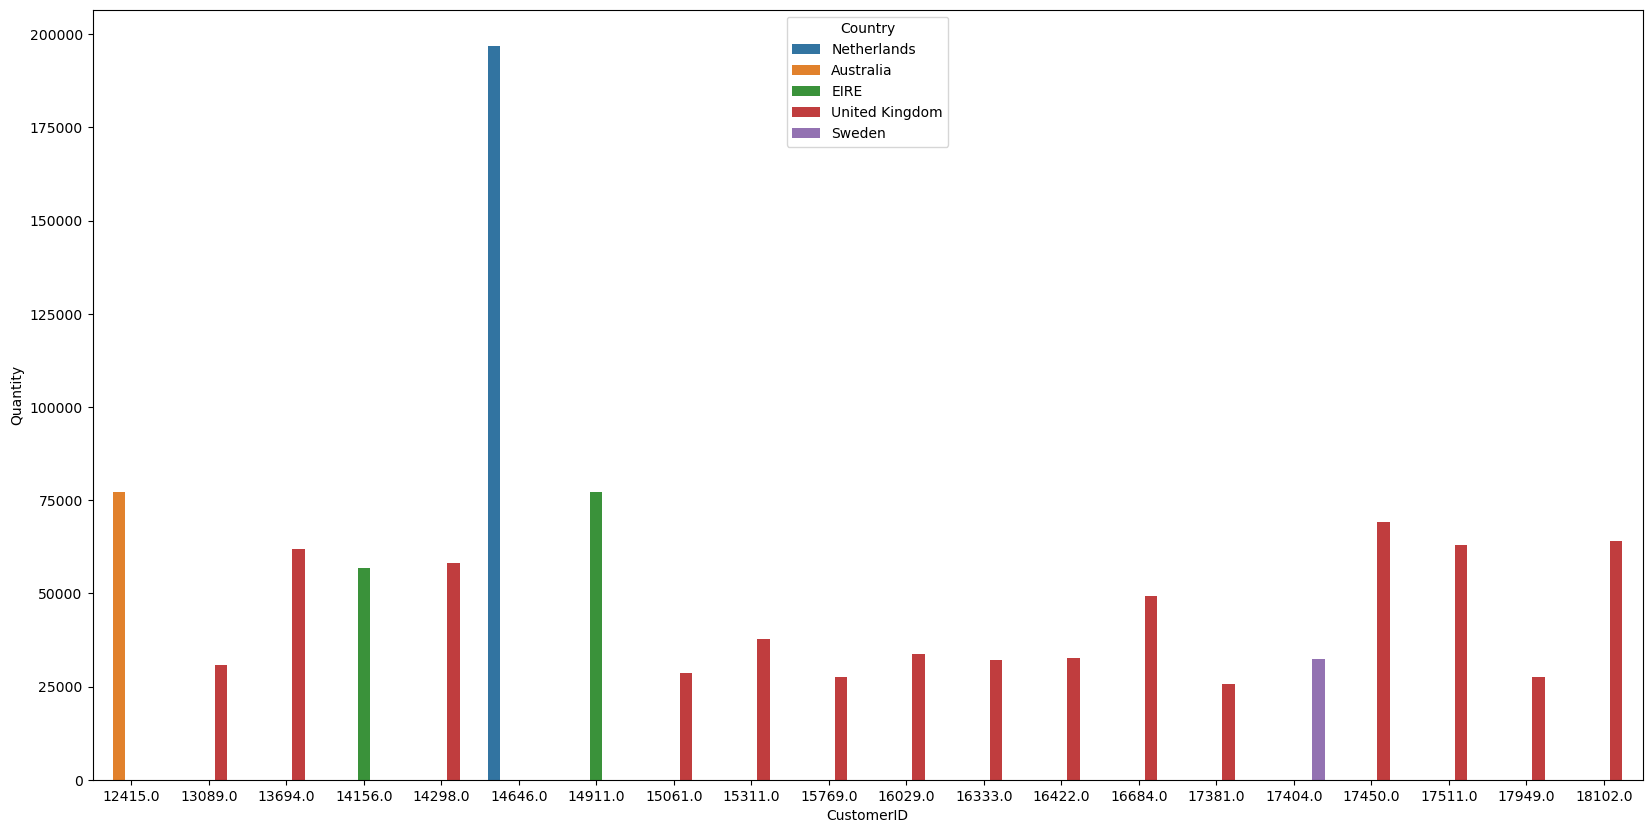

In [36]:
plt.figure(figsize=(20,10))
df1=df.groupby(['CustomerID','Country']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.CustomerID
y=df1.iloc[:,2]
sns.barplot(x=x[:20],y=y[:20],data=df1,hue=df1.Country[:20])

# Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [37]:
q1=df['Quantity'].quantile(0.25)
q3=df['Quantity'].quantile(0.75)
iqr=q3-q1
df=df.loc[~((df['Quantity']>q3+1.5*iqr)|(df['Quantity']<q1-1.5*iqr))]
df.shape

(374958, 8)

In [38]:
q1=df['UnitPrice'].quantile(0.25)
q3=df['UnitPrice'].quantile(0.75)
iqr=q3-q1
df=df.loc[~((df['UnitPrice']>q3+1.5*iqr)|(df['UnitPrice']<q1-1.5*iqr))]
df.shape

(339453, 8)

<Axes: >

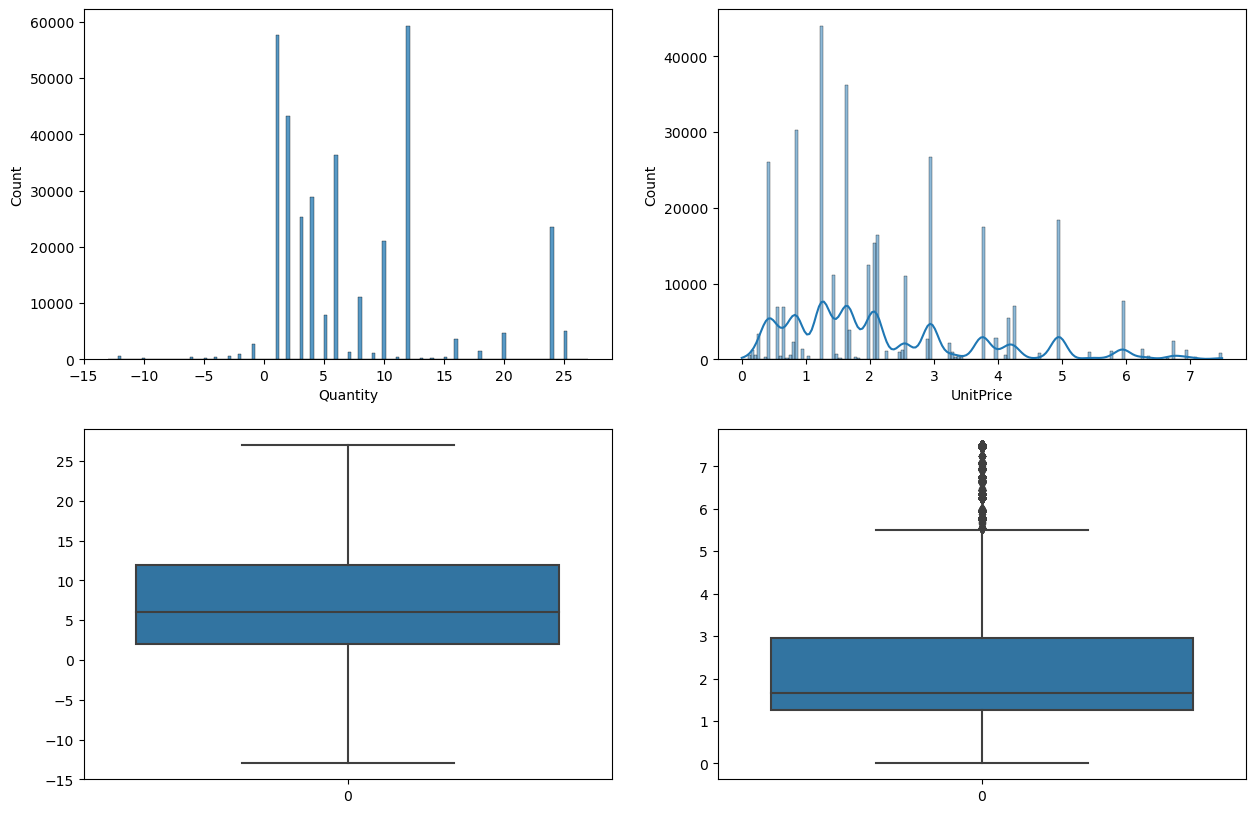

In [40]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Quantity'])
plt.subplot(2,2,2)
sns.histplot(df['UnitPrice'],kde=True)
plt.subplot(2,2,3)
sns.boxplot(df['Quantity'])
plt.subplot(2,2,4)
sns.boxplot(df['UnitPrice'])

<Axes: xlabel='CustomerID', ylabel='Quantity'>

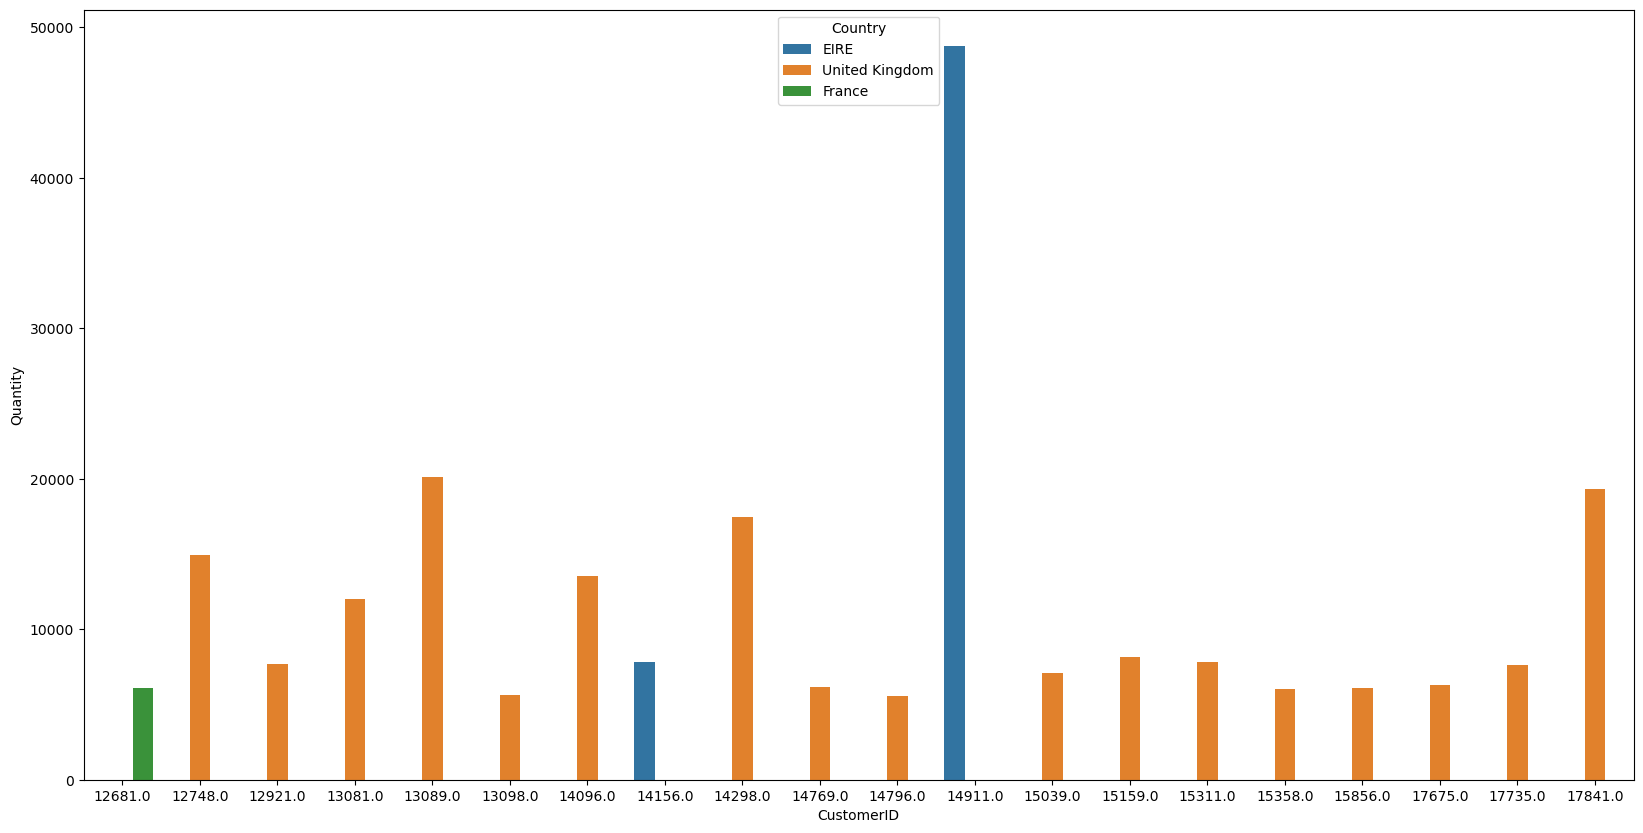

In [41]:
plt.figure(figsize=(20,10))
df1=df.groupby(['CustomerID','Country']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.CustomerID
y=df1.iloc[:,2]
sns.barplot(x=x[:20],y=y[:20],data=df1,hue=df1.Country[:20])

<Axes: xlabel='StockCode', ylabel='Quantity'>

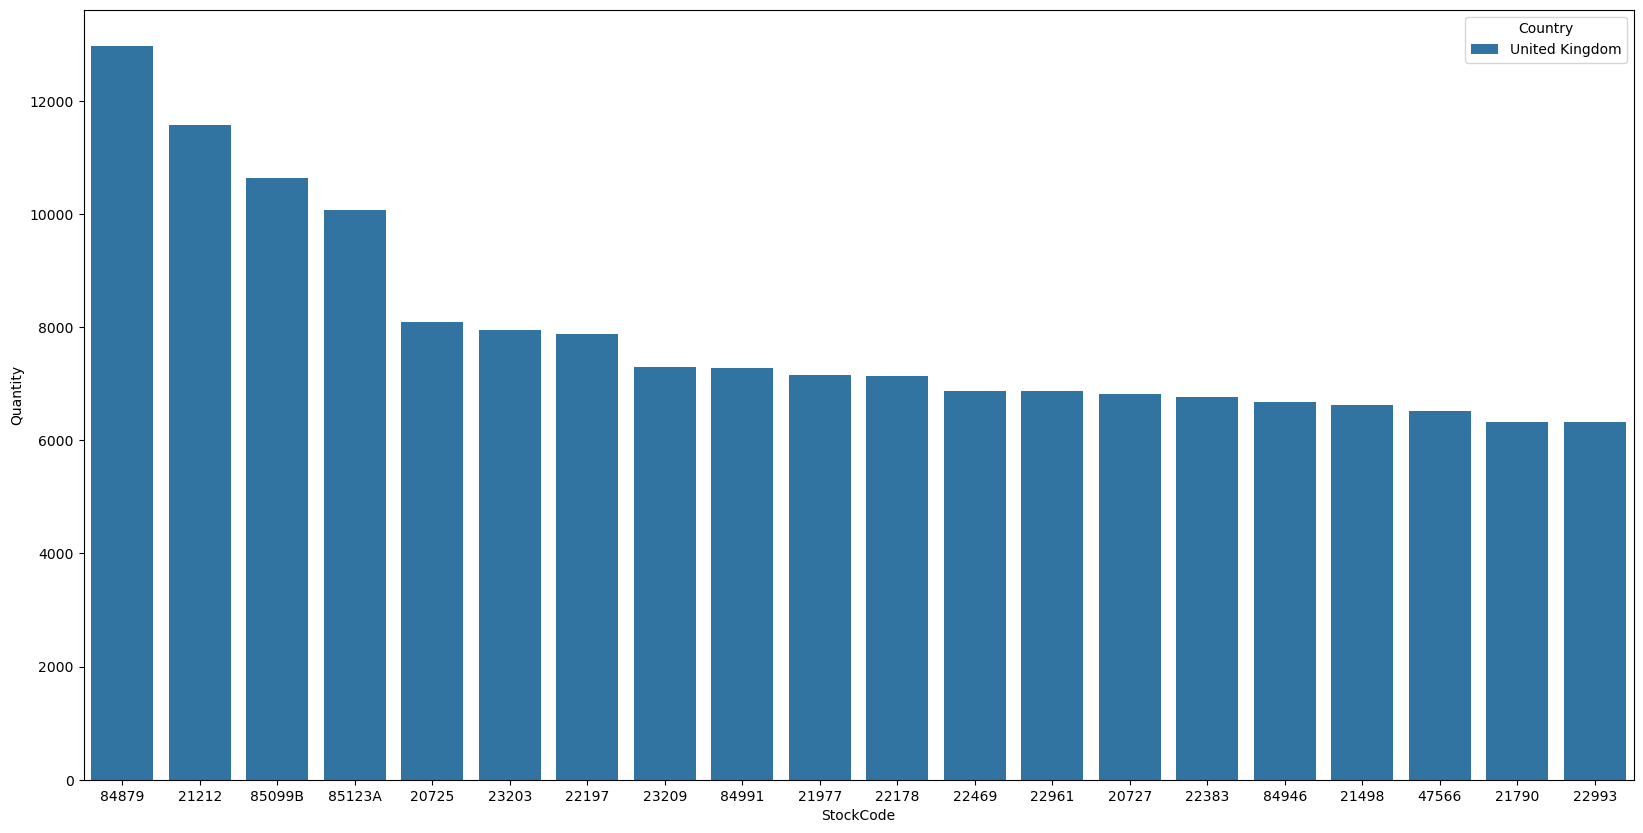

In [42]:
plt.figure(figsize=(20,10))
df1=df.groupby(['StockCode','Country']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.StockCode
y=df1.iloc[:,2]
sns.barplot(x=x[:20],y=y[:20],data=df1,hue=df1.Country[:20])

<Axes: xlabel='StockCode', ylabel='Quantity'>

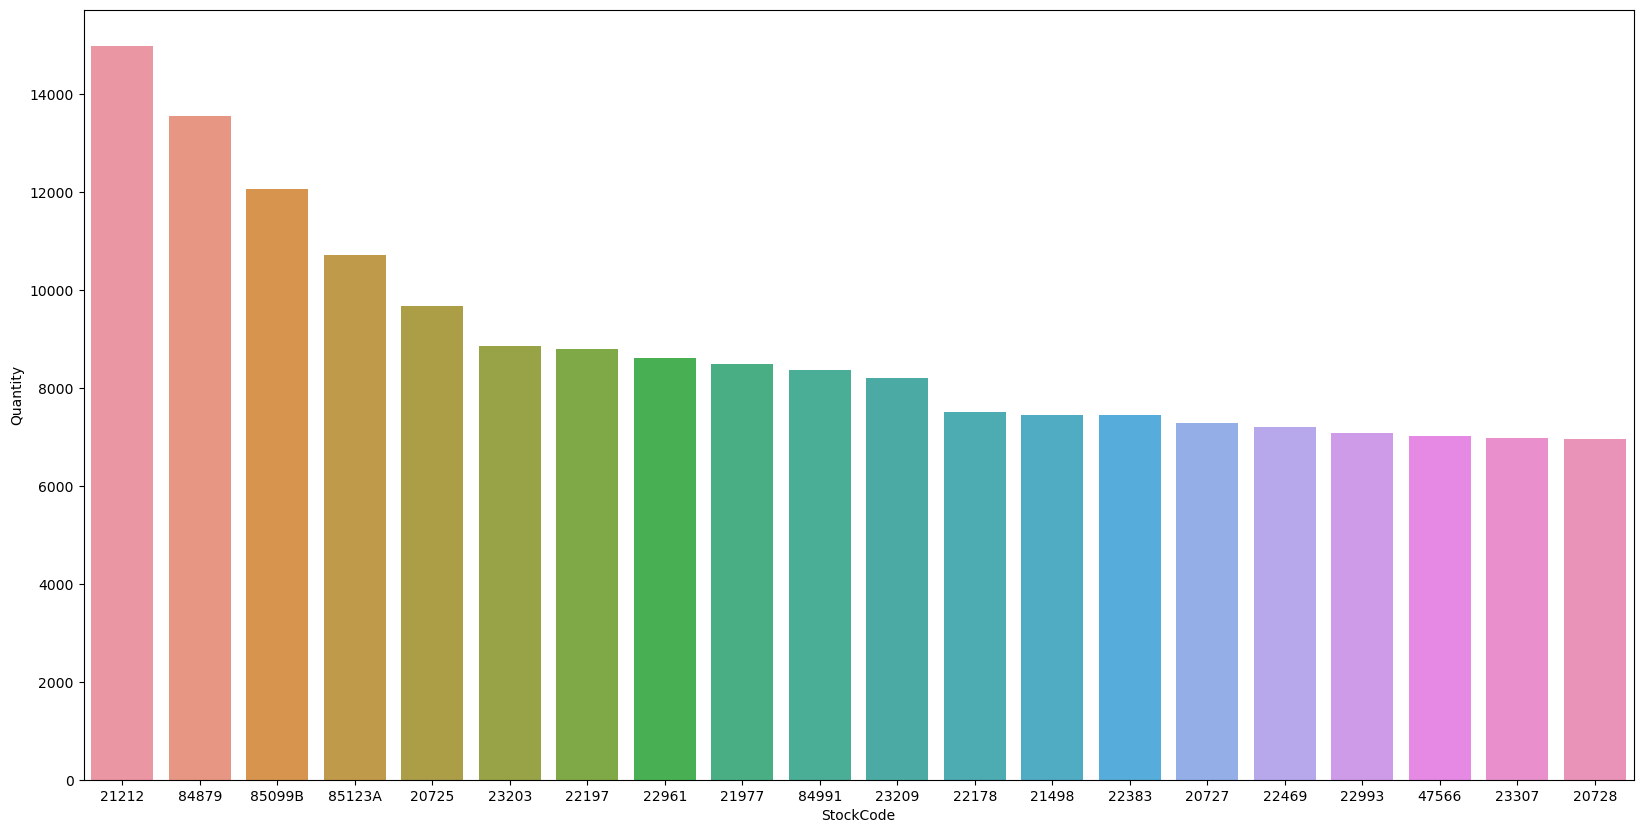

In [43]:
plt.figure(figsize=(20,10))
df1=df.groupby('StockCode').Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.StockCode
y=df1.iloc[:,1]
sns.barplot(x=x[:20],y=y[:20],data=df1)

<Axes: xlabel='Country', ylabel='Quantity'>

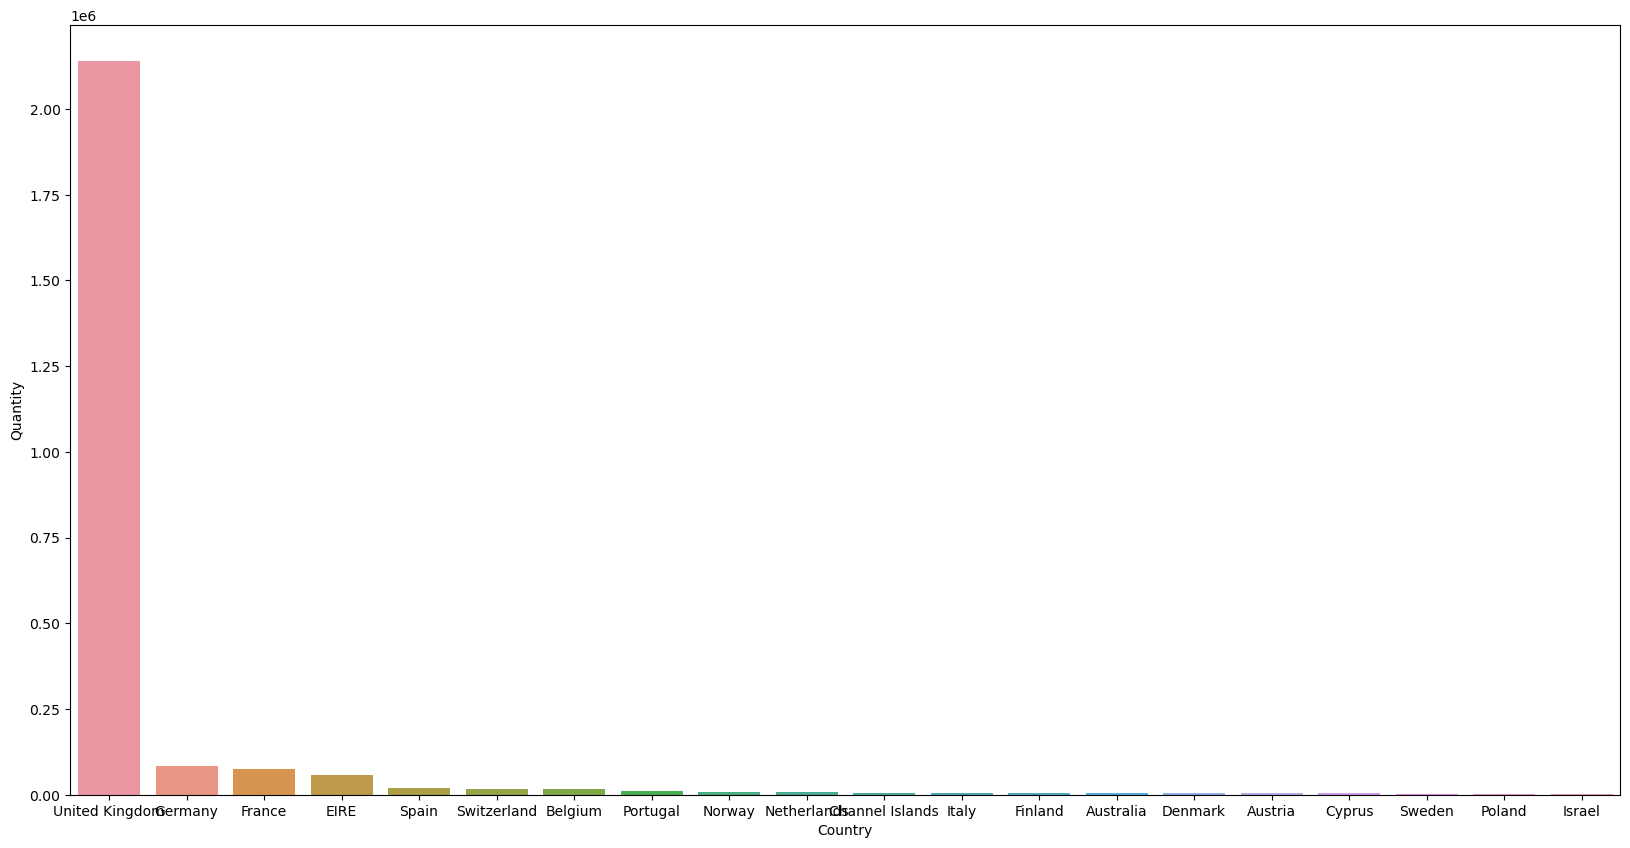

In [44]:
plt.figure(figsize=(20,10))
df1=df.groupby('Country').Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
x=df1.Country
y=df1.iloc[:,1]
sns.barplot(x=x[:20],y=y[:20],data=df1)